In [60]:
# !pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [80]:
import prince
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

### Import the HR data set 

In [62]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'
data = pd.read_csv(data_url)

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    int64  
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

In [64]:
data.Zip = str(data.Zip)

### Pull out the categorical variables and note the dimensions of the data set.

In [65]:
cat = data.select_dtypes(include='O')
print(f'The dataset has {cat.shape[0]} rows and {cat.shape[1]} columns')

The dataset has 310 rows and 14 columns


### Reduce these categorical features down to two dimensions using MCA.

In [66]:
model = prince.MCA()
mca = model.fit(cat)
coordinates = mca.transform(cat)

### Plot the coordinates of each resulting dimension.

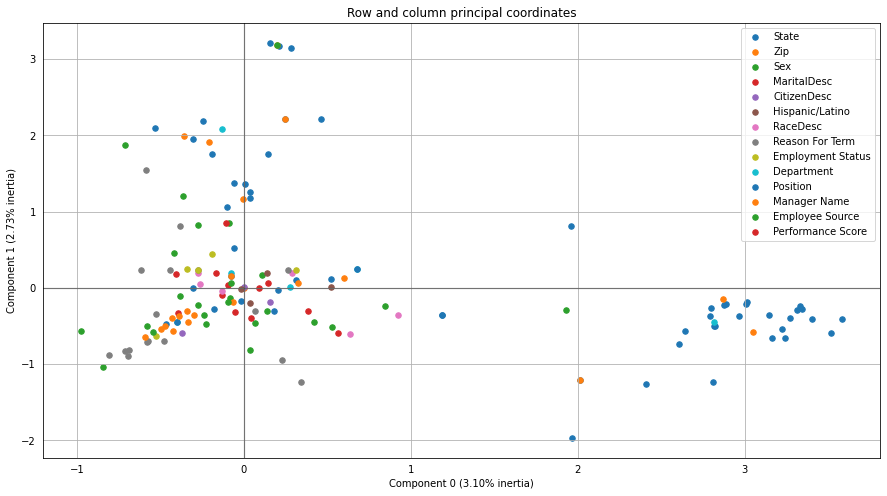

In [67]:
ax = mca.plot_coordinates(
    X = cat,
    figsize=(15,8),
    show_row_points=False,
)

### One hot encode the categorical features and note the change in dimensions in the data set.

In [68]:
enc = OneHotEncoder(sparse=False)
enc_feats = enc.fit_transform(cat)

In [69]:
print(f'The dataset now has {enc_feats.shape[0]} rows and {enc_feats.shape[1]} columns')

The dataset now has 310 rows and 156 columns


### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [70]:
model = prince.CA()
ca = model.fit(enc_feats)
coordinates = ca.transform(enc_feats)

### Plot the coordinates of each resulting dimension.

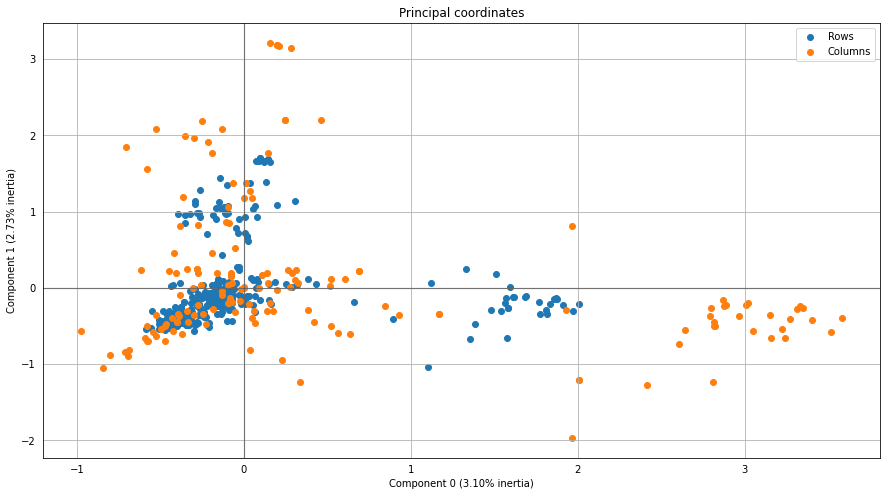

In [71]:
ax = ca.plot_coordinates(
    X = enc_feats,
    figsize=(15, 8),
    show_row_labels=False,
    show_col_labels=False
)

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [72]:
model = prince.FAMD()
famd = model.fit(data)
coordinates = famd.transform(data)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

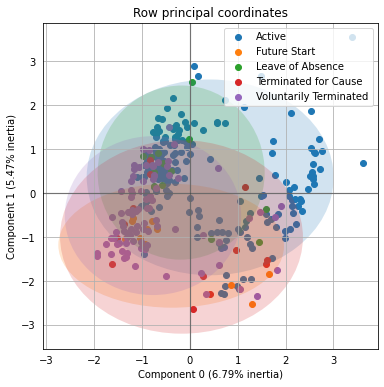

In [81]:
famd.plot_row_coordinates(data, color_labels=data['Employment Status'])
plt.show()